# 量子回路の基礎 - トフォリゲート

## 歴史的背景


40年前、50人の思想家からなるグループがMITのエンディコット・ハウスの芝生で写真を撮るために並びました。1981年に開催された、MITとIBMが共同で開催した計算物理に関する会議(Physics of Computation Conference)において、歴史を作っていると思った人はその時、ほとんどいませんでした。そこは、コンピューティングの物理、特に今、急成長中の分野で、教科書や大学のコースにふさわしい重要な科目である、量子コンピューティングが間違いなく誕生した場所であったのです。

この会議で、ファインマンがあの有名な言葉を述べました：「自然は古典的ではない。自然のシミュレーションをしたいなら、量子力学的にしなければならない。なんと、それは素晴らしい問題だ。なぜなら、そう簡単な問題には見えないからだ。」[1] 今月初めに、我々は、この重要な会議の40周年を祝いました。[こちら](https://youtu.be/GR6ANm6Z0yk)でその詳細を読むことができます。

![](resources/2021-spring-lab1_conference-photo.jpeg)

この会議で議論されたテーマのうちの一つに、可逆計算がありました。それは、MITのトマソ・トフォリとエドワード・フレドキンがその過去数年にわたりすでに考えていたことでした。[2-3] トフォリは、AND/NANDゲートの可逆バージョンを思いつきました(これは現在トフォリゲートまたは制御制御NOTゲートと呼ばれています)。NANDゲートは古典コンピューターでは普遍的であるので、トフォリゲートは、普遍的で可逆な論理ゲートになります。  

量子コンピューティングは、可逆コンピューティングの特別な形です：量子コンピューター上ではどんな可逆なゲートも実装でき、よってトフォリゲートも量子論理ゲートとなります。  
しかし、トフォリゲートのみでは、量子コンューティングにおける普遍的なゲートとはなりません。

この演習では、トフォリゲート、また、量子コンピューターにおける普遍的なゲートセットについて探究します。

>  参考文献
> 1. Feynman, Richard P. "Simulating physics with computers." Int. J. Theor. Phys 21.6/7 (1982).
> 1. Toffoli, Tommaso. "Reversible computing." International colloquium on automata, languages, and programming. Springer, Berlin, Heidelberg, 1980.
> 1. Fredkin, Edward, and Tommaso Toffoli. "Conservative logic." International Journal of theoretical physics 21.3 (1982): 219-253.

## 古典論理ゲート

古典計算でよく使用されるモデルの1つは、ブール論理ゲートまたは古典論理ゲートです。このゲートはブール関数、つまりバイナリー（0,1）の入力と出力のみを持つ関数を表します。  
ブール論理の興味深い側面の1つは、とり得る全てのバイナリ―関数を少数の異なる論理ゲートの組み合わせで表現できることです。  
これは機能的に完全なセットと呼ばれます。有名なセットの1つは `AND` と `NOT` です。この2つのゲートは、すべての機能を表現するのに十分です。 `OR` と `NOT` についても同じことが言えます。 `NAND` や `NOR` などは単体で普遍性をもつ小さなセットですが、関数 `AND` 、`NOT` 、`OR` は、古典的な計算の基本ブロックとして見なされることがよくあります。

このLabでは量子ゲートの基本的な概念を学び、トフォリゲートを題材として量子回路の構築方法を学びましょう。

In [1]:
import qiskit
qiskit.__version__

'1.4.2'

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Pauli, Statevector
from qiskit.visualization import *
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_aer import StatevectorSimulator

import math
pi=math.pi

## 量子回路

量子回路とは計算が一連の量子ゲートによって行われる計算モデルです。量子ゲートはしばしば数学的にブロッホ球における回転として表現されます。  
よく知られている量子ゲートをいくつか見てみましょう。

In [3]:
def simulate_bloch_sphere(circuit):
    """
    Simulate the circuit and plot the Bloch sphere.
    """
    # Simulate the circuit
    backend = StatevectorSimulator()
    result = backend.run(circuit).result()
    
    # Get the statevector
    statevector = result.get_statevector()
    
    # Plot on a Bloch sphere
    return plot_bloch_multivector(statevector)

### Xゲート 
 
Xゲートは、パウリのX行列によって表されます：

$X = \begin{pmatrix}
0 & 1 \\
1 & 0 \\
\end{pmatrix}$

Xゲートは、ブロッホ球でのX軸まわりの$\pi$の回転と等しいです。 $|0\rangle$ を $|1\rangle$ へ、 $|1\rangle$ を $|0\rangle$ へマップします。  
古典コンピューターにおけるNOTゲートの量子版であり、ビットフリップとも呼ばれます。

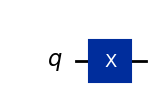

In [4]:
x_gate=QuantumCircuit(1) # 量子ビット1で量子回路を作ります
x_gate.x(0)
x_gate.draw(output='mpl')

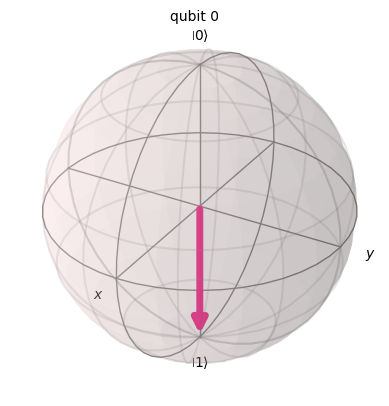

In [5]:
simulate_bloch_sphere(x_gate)

### SXゲート

SXゲートは、ブロッホ球のX軸を中心とした𝜋 / 2の回転に相当します。Xゲートの平方根であることを示すためにSXゲートと呼ばれます。このゲートを2回続けて適用すると、標準のパウリXゲートが生成されます。SXの逆はSXダガーで、反対方向に$\pi/2$回転します。

$SX = \frac{1}{2}\begin{pmatrix}
1+i & 1-i \\
1-i & 1+i \\
\end{pmatrix}$

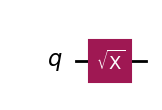

In [6]:
sx_gate = QuantumCircuit(1)
sx_gate.sx(0)  
sx_gate.draw(output='mpl')

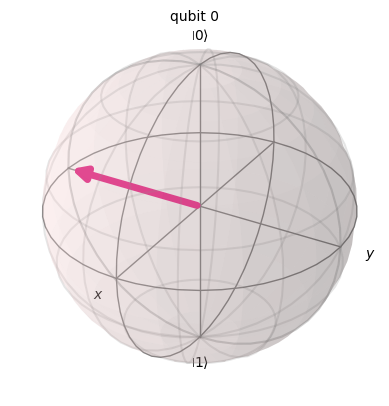

In [7]:
simulate_bloch_sphere(sx_gate)

### RZゲート


Rzゲートは、Z軸のまわりに$\phi$ 回転します(ここで、$\phi$ は実数です)。行列は以下のようになります：


$RZ = \begin{pmatrix}
1 & 0 \\
0 & e ^{i \phi } \\
\end{pmatrix}$

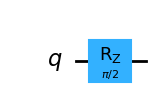

In [8]:
rz_gate = QuantumCircuit(1)
rz_gate.rz(pi/2, 0)
rz_gate.draw(output='mpl')

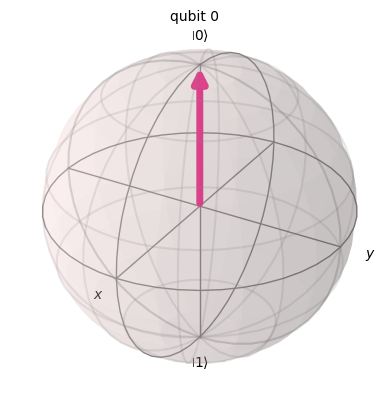

In [9]:
simulate_bloch_sphere(rz_gate)

Z軸まわりの回転のため、デフォルトの状態$|0\rangle$に適用しても違いがわかりません。
SXゲートを適用して生成された状態を代わりに使用し、そこにRZを適用してみましょう。

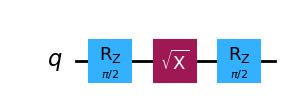

In [10]:
rz_gate.sx(0)
rz_gate.rz(pi/2, 0)
rz_gate.draw(output='mpl')

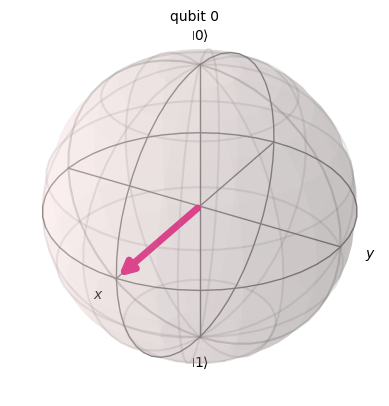

In [11]:
simulate_bloch_sphere(rz_gate)

### Hゲート

アダマールゲートは、$X$軸と$Z$軸の間の軸の周りに$\pi$回転します。
基本状態$|0\rangle$を$\frac{|0\rangle + |1\rangle}{\sqrt{2}}$にマップします。この状態は$|+\rangle$とも書かれます。これは、量子状態の測定値が`1`または`0`になる確率が等しいということです。  
つまり状態の「重ね合わせ」が作られることを意味します。

アダマールは、$|0\rangle$ $|1\rangle$基底と$|+\rangle$ $|-\rangle$基底を変換します。

$H = \frac{1}{\sqrt{2}}\begin{pmatrix}
1 & 1 \\
1 & -1 \\
\end{pmatrix}$

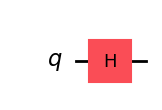

In [12]:
# |0>の量子ビットにHゲートをかけてみます
h_gate = QuantumCircuit(1)
h_gate.h(0)
h_gate.draw(output='mpl')

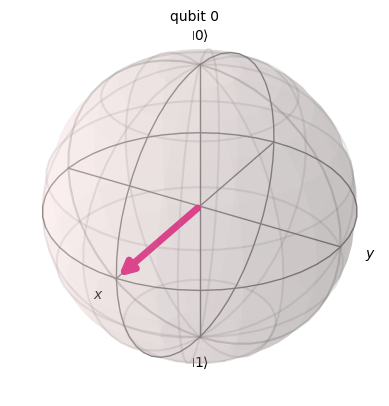

In [13]:
simulate_bloch_sphere(h_gate)

### CXゲート(CNOTゲート)


制御NOT(またはCNOT、またはCX)ゲートは、2量子ビットに作用します。  
最初の量子ビットが$|1\rangle$の時のみ、2個目の量子ビットにNOT演算(Xゲートをかけるのと等しい)を適用し、それ以外の場合は何もしません。

> 注意：Qiskitでは、文字列のビットに、右から左へ向かって番号を付けます。

$CX = \begin{pmatrix}
1 & 0 & 0 & 0  \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
\end{pmatrix}$

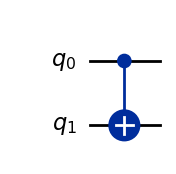

In [14]:
cx_gate = QuantumCircuit(2)
cx_gate.cx(0,1)
cx_gate.draw(output='mpl')

### CCXゲート (トフォリゲート)

CCXゲート(制御制御Xゲート)は、トフォリゲートとも呼ばれます。  
CCXゲートは3量子ビットゲートで、2個の制御ビットと1個の目標ビットがそれぞれ入力と出力として使われます。  
最初の2ビットが$|1\rangle$の状態にある時、パウリX(またはNOT)を3番目のビットに適用します。それ以外の場合は、何もしません。

$CCX = \begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
\end{pmatrix}$

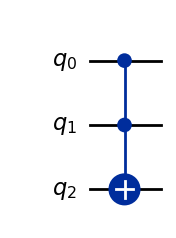

In [15]:
ccx_gate = QuantumCircuit(3)
ccx_gate.ccx(0,1,2)
ccx_gate.draw(output='mpl')

## 量子ゲートで古典論理ゲートを作る

### NOTゲート

古典NOTゲートはビットの値を反転し、先ほどのXゲートは古典NOTゲートとみなすことができます。  
NOTゲートの真理値表は以下のようになります：

| 入力 | 出力 |
| --- | --- | 
| 1 | 0 |
| 0 | 1 |

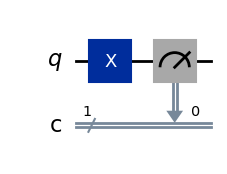

In [16]:
not_gate=QuantumCircuit(1,1) # １量子ビットと1古典ビットで量子回路を作ります
not_gate.x(0)
not_gate.measure(0,0)
not_gate.draw(output='mpl') 

### ANDゲート

ANDの出力は、入力が両方とも真であった時のみ真になります。  
ANDゲートの真理値表は以下のようになります：

| A (入力) | B (入力) | 出力 |
| --- | --- | --- |
| 0 | 0 | 0 | 
| 0 | 1 | 0 |
| 1 | 0 | 0 |
| 1 | 1 | 1 |

トフォリゲートを使って、2つの制御ビットを入力ビット、目標ビットを出力ビットとみなすことで、ANDゲートの解を得ることができます。

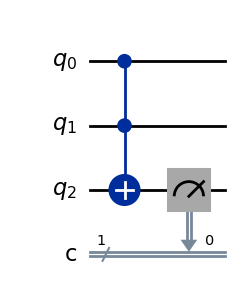

In [17]:
and_gate=QuantumCircuit(3,1) # 3量子ビットと1古典ビットで量子回路を作ります
and_gate.ccx(0,1,2)
and_gate.measure(2,0)
and_gate.draw(output='mpl')

### ORゲート

ORゲートは、少なくとも一つの入力が真であった時に真を返すゲートです。  
真理値表は、以下のようになります：

| A (入力) | B (入力) | 出力 |
| --- | --- | --- |
| 0 | 0 | 0 | 
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 1 |

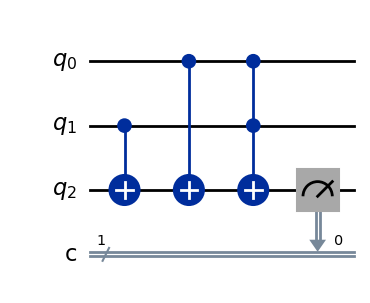

In [18]:
or_gate=QuantumCircuit(3,1) # 3量子ビットと1古典ビットで量子回路を作ります
or_gate.cx(1,2)
or_gate.cx(0,2)
or_gate.ccx(0,1,2)
or_gate.measure(2,0)
or_gate.draw(output='mpl')

## 量子ゲートの組み合わせとコスト

実際の量子コンピューターはすべてのゲートが物理的に実装されていることは通常ありません。代わりに、ユニバーサル・ゲートセットを構成する基本ゲートの組み合わせで代替しています。ユニバーサル・ゲートセットは古典ゲートでも同様で、すべての撮り得る演算を実装することができるゲートのセットです。

このため、Qiskitは、構築した回路を基本ゲートセットのみを使った回路に分解しなければなりません。通常量子回路がハードウェアに送られる際に、トランスパイラーで自動的に実行されます。しかし、ここでは学習のため、主導で回路を基本ゲートのみで構築してみましょう。例えばIBM Quantumの基本ゲートは、通常、CX, ID, RZ, SX, Xゲートです。

では、以下の回路をみてみましょう：

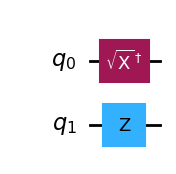

In [19]:
qc = QuantumCircuit(2)
qc.sxdg(0)
qc.z(1)
qc.draw(output='mpl')

次に、基本ゲートのみを使って、上記の回路をどのように分解すればよいか考えてみましょう。

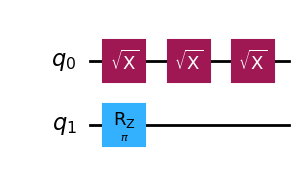

In [20]:
qc = QuantumCircuit(2)
qc.sx(0)
qc.sx(0)
qc.sx(0)
qc.rz(pi,1)
qc.draw(output='mpl')

ご覧の通り、基本ゲートのみを使いましたが、そのためにより多くのゲートが必要になりました。  
ご想像の通り、より多くのゲートを使った回路は実行時により複雑になっていきます。そのため、回路内のゲート数をコストとして考えて考慮することが必要となります。

しかし、すべてのゲートが等しい価値とはみなされないため、回路のコストを計算する時、以下の式を使います：

 **コスト =(CXゲートの数)*10 + (その他の基本ゲートの数)**

### 例:アダマールゲート

ここでは例としてアダマールゲートを基本ゲートセットのみを用いて構築してみます。
$X$軸と$Z$軸の中間の軸にそって回転する基本ゲートはないため、代わりに$X$軸のまわりの回転と$Z$軸のまわりの回転を使って同じ結果を得るようにします。

どのような回転が必要だと思いますか？

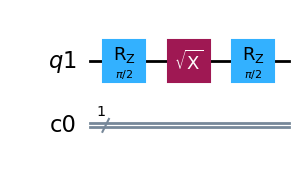

In [21]:
q=QuantumRegister(1)
c=ClassicalRegister(1)
qc=QuantumCircuit(q,c)
qc.rz(pi/2, 0)
qc.sx(0)
qc.rz(pi/2, 0)
qc.draw(output='mpl')

覚えているかもしれませんが、これはさきほどRZゲートの回転を表示したときの回路です。
さきほど、$|0\rangle$または$|1\rangle$の状態にあるとき、最初のRZは何もしないことがわかりました。そのため、少し役に立たないと感じるかもしれません。
しかし、$|+\rangle$と$|-\rangle$の状態では、最初の回転は効果があります。逆のシナリオは、SXゲートを適用した後、再び$|0\rangle$または$|1\rangle$の状態になり、2回目のRZは効果がないというものです。

### 制御回転ゲート

先ほど制御NOTの働きを見ましたが、$Y$軸まわりの制御回転をどのように構築するかという例を示しましょう。回転$\theta$はどの角度でもよく、$\pi$である必要はありません。以下は例です。

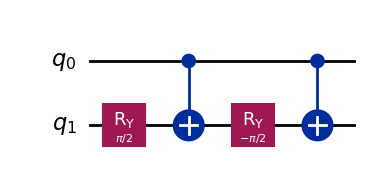

In [22]:
qc = QuantumCircuit(2)
theta = math.pi # thetaは何度でもよいです (任意の値としてpiを選択)
qc.ry(theta/2,1)
qc.cx(0,1)
qc.ry(-theta/2,1)
qc.cx(0,1)
qc.draw(output='mpl')

この回路を見てみると、最初の量子ビットが0の場合、2つの回転がキャンセルされ何も起こらないことが分かります。

一方、最初の量子ビットが1の場合、$\theta / 2$回転を２回適用し、$\theta$回転となる状態を得ます。これは、$X$軸と$Y$軸が直行しているために起こります。

### Excercise: トフォリゲート
````{admonition} Excercise
先ほど、我々の基本ゲートセットでアダマールゲートをどのように構築するか見ましたが、今度は、トフォリゲートを同じように構築したいと思います。  
なぜトフォリゲートなのでしょうか？

上記で述べたように、トフォリゲートは、古典コンピューターにおいてNANDゲートと同じように、ユニバーサル・ゲートでありますが、可逆的です。  
さらに、アダマールゲートとともに量子コンピューターではユニバーサル・ゲートを構築します。

基本ゲートを使ってより複雑なゲートを表現するいくつかの例を見てきました。今回は、得られた知識を使って、我々の基本ゲートのみを使ってトフォリゲートを構築します。  
このために、先ほどの例である、制御回転を構築し使う方法が重宝するでしょう。

```{warning}
IBM Quantumシステムの基本ゲートはCX、RZ、SX、Xであり、そのほかのゲートは使えないことを覚えておいてください。
    
もちろん、コストの最小化にもトライしてください。(コストは **CNOT** の数の **10倍** **プラス** **その他のゲート** の数です。)
    
$$
Cost = 10 N_{CNOT} + N_{other}
$$

```

```python
circuit = QuantumCircuit(3)

# この下にコードを書いてください





# この上にコードを書いてください

circuit.measure_all() # すべて量子ビットを測定します

```
````

In [23]:
circuit = QuantumCircuit(3)

theta = pi # 任意の値

# circuit.h(2)の置換
circuit.rz(pi/2, 2)
circuit.sx(2)
circuit.rz(pi/2, 2)
# 既に基本ゲート
circuit.cx(1,2)
# circuit.tdg(2)の置換
circuit.rz(7*pi/4, 2)
# 既に基本ゲート
circuit.cx(0,2)
# circuit.t(2)の置換
circuit.rz(pi/4, 2)
# 既に基本ゲート
circuit.cx(1,2)
# circuit.tdg(2)の置換
circuit.rz(7*pi/4, 2)
# 既に基本ゲート
circuit.cx(0,2)
# circuit.t(1)の置換
circuit.rz(pi/4, 1)
# circuit.t(2)の置換
circuit.rz(pi/4, 2)
# circuit.h(2)の置換
circuit.rz(pi/2, 2)
circuit.sx(2)
circuit.rz(pi/2, 2)
# 既に基本ゲート
circuit.cx(0,1)
# circuit.t(0)の置換
circuit.rz(pi/4, 0)
# circuit.tdg(1)の置換
circuit.rz(pi/4, 1)
# 既に基本ゲート
circuit.cx(0,1)

circuit.measure_all() # すべての量子ビットを測定します

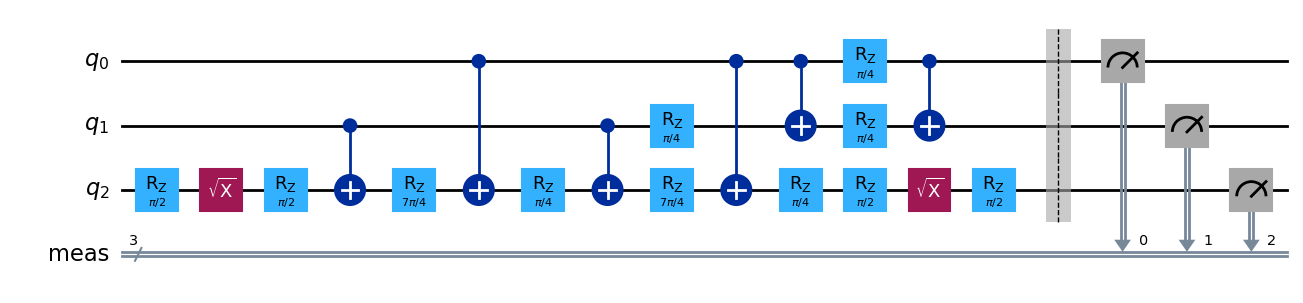

In [24]:
qc = circuit

qc.draw(output='mpl')

```{admonition} 解説
:class: tip
トフォリゲートの構築はいくつかの説明が可能ですが、そのうちの一つである最も簡易なアダマールゲートとTゲートから構成する方法が掲載されています。

![トフォリゲートのイラスト](./resources/2021-spring-lab1_toffoli.png)

この回路の最後に2つのSWAP操作があることがわかります。これは`q0`が`q1`と接続されていないことに起因し、一般的には実機のカップリング・マップに依存するので、SWAPを省く(CXとTダガーは`q2`ではなく`q1`にある）ことができます。

SWAPを除くと、回路は4つのゲート（アダマール、CX、TとTの共役転置）で構成されていることがわかります。Tゲートを調べると、実際にはZ軸周りに$\pi/4$の回転であり、$\phi=\pi/4$のRz($\phi$)ゲートとみなせます。Tダガーを構成するには、逆の回転を持つRzゲートを用います。

また、アダマールゲートは2つのRzゲートと1つのSXゲートを使って構成できます。以上、すべてのアダマールゲートとTゲート、Tダガーゲートを4つのゲートに分解すると回答のような回路が得られます。
```